In [3]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os
import numpy as np
from qiskit import execute, transpile
from qiskit.circuit import ClassicalRegister, QuantumCircuit, QuantumRegister
from qiskit.providers.aer.backends import AerSimulator
from qiskit.visualization import plot_histogram
from qiskit.quantum_info import DensityMatrix, state_fidelity, partial_trace
from skimage import data
from skimage.color import rgb2gray
from skimage.transform import resize
from skimage import io
import imageio as iio
from neqr import NEQR

import Functions as f


The image will be send from the Mentor to the Mentee:


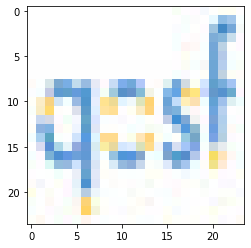

In [4]:
qosf = iio.imread('C:/Users/Med Amine Garrach/Desktop/QOSF project/sending files/Mentee file/qosf.jpg')
qosf.shape
print("The image will be send from the Mentor to the Mentee:")
plt.imshow(qosf)
plt.show()

# send_file Function test 

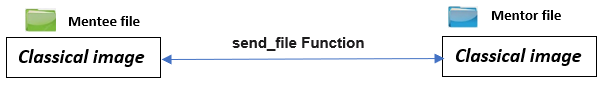

Mentee's State:	 [0 1 1 1 0 0 0 0 0 0 1 0 1 1]
Mentee's Bases:	 [1 1 0 0 1 1 0 0 1 1 0 1 1 0]
Mentor's Bases:	 [1 0 1 0 0 0 1 1 1 1 0 1 0 0]
The Generated key is:  0100101
The path of file :  C:/Users/Med Amine Garrach/Desktop/QOSF project/sending files/Mentee file/qosf.jpg
Key for encryption :  37
Encryption Done...
NEQR inverse: from the Qcricuit to image...
The path of file :  C:/Users/Med Amine Garrach/Desktop/QOSF project/sending files/Mentee file/qosf.jpg
Note : Encryption key and Decryption key must be same.
Key for Decryption :  37
Decryption Done...
The image sent to Mentor file successfully!!


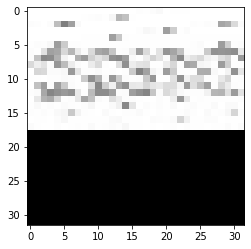

In [5]:
f.send_file('C:/Users/Med Amine Garrach/Desktop/QOSF project/sending files/Mentee file', 'qosf.jpg','C:/Users/Med Amine Garrach/Desktop/QOSF project/sending files/Mentor file/')

# Project Steps

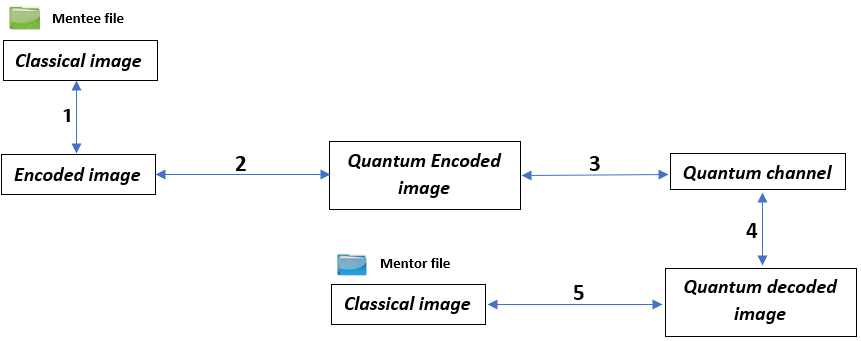

0.  Convert the image to grayscale
1.	Encode the image with a generated key using BB84 protocol. 
2.	Transform the encoded image into quantum circuit using NEQR model. 
3.	Quantum teleportation, teleport the quantum data from the sender to the receiver into quantum channel.
4.	Convert the data to the encoded image.
5.	Decode the image using the same generated key.


# Step0: Convert the image to grayscale 

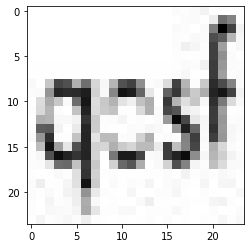

In [6]:
gray_qosf = rgb2gray(qosf)

plt.imshow(gray_qosf, cmap="gray")
plt.show()

# Step1 : Encode the image with a generated key using BB84 protocol.

In [7]:
key = f.BB84key()
print("The Generated key is: ",key)

Mentee's State:	 [0 1 0 0 1 0 0 0 0 0 0 0 0 0]
Mentee's Bases:	 [1 1 1 1 0 1 0 0 0 1 1 0 1 1]
Mentor's Bases:	 [0 0 1 0 1 0 0 1 0 1 1 0 0 1]
The Generated key is:  0000000


In [8]:
path = r'C:/Users/Med Amine Garrach/Desktop/QOSF project/sending files/Mentee file/gray_qosf.png'
key=int(key,2)
f.ecrypt(path, key)

The path of file :  C:/Users/Med Amine Garrach/Desktop/QOSF project/sending files/Mentee file/gray_qosf.png
Key for encryption :  0
Encryption Done...


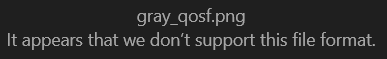

# Step2 : Transform the encoded image into quantum circuit using NEQR model.

Quantum image processing (QIMP) is using quantum computing or quantum information processing to create and work with quantum images.\
Due to some of the properties inherent to quantum computation, notably entanglement and parallelism, it is hoped that QIMP technologies will offer capabilities and performances that surpass their traditional equivalents, in terms of computing speed, security, and minimum storage requirements.
NEQR-based quantum image translation to map the position of each picture element in an input image into a new position in an output imag and quantum image scaling to resize a quantum image were discussed.

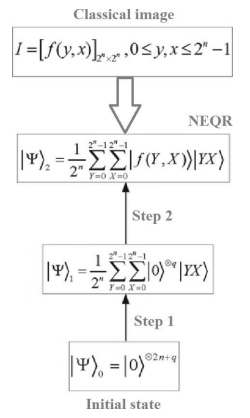

In [9]:
image_neqr = NEQR()
shots = 8192
backend = AerSimulator()

In [10]:
qubits_idx = QuantumRegister(size=2, name="qubits_idx")
intensity = QuantumRegister(size=8, name="intensity")
bits_idx = ClassicalRegister(size=2, name="bits_idx")
bits_intensity = ClassicalRegister(size=8, name="bits_intensity")

In [11]:
qc_gray = QuantumCircuit(intensity, qubits_idx, bits_intensity, bits_idx)
qc_gray= image_neqr.image_quantum_circuit(image=gray_qosf, measurements=True)

In [12]:
print("Circuit dimensions")
print(f"Number of qubits: {qc_gray.qregs[0].size + qc_gray.qregs[1].size}")
print(f"Circuit depth: {qc_gray.depth()}")
print(f"Circuit size: {qc_gray.size()}")
print(f"Circuit operations: {qc_gray.count_ops()}")


Circuit dimensions
Number of qubits: 18
Circuit depth: 4796
Circuit size: 10069
Circuit operations: OrderedDict([('x', 6400), ('mcx_gray', 3641), ('barrier', 578), ('measure', 18), ('h', 10)])


=> we have a huge circuit depth, which is a big problem due the level of noise on NISQ devices.\
The image will use 18 qubits for conversion and cause many effects such as gate noise, coherence, fidelity...

# Step3 : Quantum teleportation, teleport the quantum data from the sender to the receiver into quantum channel.

In [13]:
#qc_gray=f.QTeleport(qc_gray)

=> Due to the large number of qubits on the quantum circuit, it will take a long time to implement the transformation of the quantum image into a classical image after the application of the quantum circuit.

# Step4 : Convert the data to the encoded image.

NEQR inverse: from the Qcricuit to image


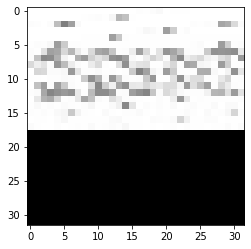

In [14]:
counts_total = execute(experiments=qc_gray, backend=backend, shots=shots).result().get_counts()

print("NEQR inverse: from the Qcricuit to image")
im=image_neqr.reconstruct_image_from_neqr_result(counts_total, (32,32))
plt.gray()
plt.imshow(im)
plt.show()

=> The projected image after each NEQR and NEQR-inverse transformation gives this large image adjustment due to the noise level on NISQ devices with other additive effects on the quantum circuit.

# Step5 :Decode the image using the same generated key.

In [15]:
f.decry(path, key)

The path of file :  C:/Users/Med Amine Garrach/Desktop/QOSF project/sending files/Mentee file/gray_qosf.png
Note : Encryption key and Decryption key must be same.
Key for Decryption :  0
Decryption Done...


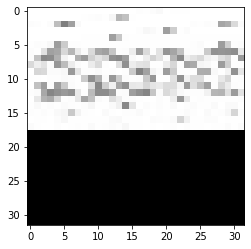

In [16]:
path = "C:/Users/Med Amine Garrach/Desktop/QOSF project/sending files/Mentor file/"
plt.rcParams["savefig.directory"] = os.chdir(os.path.dirname(path))
plt.imshow(im)
plt.savefig("img.png")